<a href="https://colab.research.google.com/github/DBagrecha/Senseloaf/blob/main/Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
glove_path='/content/drive/MyDrive/flickr30k_images/glove.6B.200d.txt'
embeddings_index = {} 
f = open(glove_path, encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

In [4]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
path='/content/drive/MyDrive/Text Clustering/'
doc = open(path+'files.txt','r').read()
fname=[]
for i in doc.split('\n'):
  fname.append(i)
avg_text=[]
for file in fname:
  with open(path+'text/'+file, 'rb') as f:
    doc = str(f.read())
  #doc = open(path+'text/'+file,'r').read()
  n_sent=len(sent_tokenize(doc))
  avg_sent=[]
  for sent in sent_tokenize(doc):
    #print(1,sent)
    #blank sentences
    n_words=len(word_tokenize(sent))
    if(n_words>3):
      sent_sum=np.zeros(200, dtype = float)
    for word in word_tokenize(sent):
      if(word in embeddings_index):
        #print(word)
        sent_sum=np.add(sent_sum,embeddings_index[word])
    avg_sent.append(sent_sum/n_words)
  sum=np.zeros(200, dtype = float)
  for i in avg_sent:
    sum=sum+i
  avg_text.append(sum/n_sent)

In [6]:
len(avg_text)

2225

In [7]:
df=pd.DataFrame(fname,columns=['File_name'])
df.head()

,File_name
0,text (1).txt
1,text (10).txt
2,text (100).txt
3,text (1000).txt
4,text (1001).txt


In [8]:
avg_text=np.array(avg_text)
for i in range(1,201):
  df[i]=avg_text[:,i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df

,File_name,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,text (1).txt,0.080314,0.215110,-0.112809,-0.169757,0.009291,0.067939,-0.253601,-0.036148,0.076020,...,-0.085922,0.121182,-0.097925,0.054979,0.063338,0.058147,-0.066809,0.146027,-0.054699,0.083929
1,text (10).txt,0.058517,0.216435,-0.048337,-0.232963,0.082943,0.101053,-0.341938,0.075348,0.021606,...,-0.078488,0.083983,-0.057246,0.093794,0.141730,-0.108440,-0.077377,0.121590,-0.031576,0.145341
2,text (100).txt,0.043484,0.119912,-0.071150,-0.200412,0.041910,0.119229,-0.178916,-0.017803,0.036452,...,-0.104440,0.075090,-0.126771,0.044595,0.036062,0.033405,-0.028457,0.086145,-0.017459,0.065640
3,text (1000).txt,0.060377,0.260237,-0.073447,-0.215268,-0.000299,0.190514,-0.418936,0.034616,0.021785,...,-0.194961,0.086299,-0.056962,0.066033,0.069914,-0.022761,-0.010564,0.129973,-0.073166,0.238873
4,text (1001).txt,0.044396,0.113152,-0.148489,-0.168943,0.026190,0.122647,-0.056111,-0.156699,0.010596,...,-0.135041,0.069248,-0.125327,0.062113,0.100228,0.105418,0.033606,0.025853,-0.201114,0.010124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,text (995).txt,0.059434,0.176733,-0.111030,-0.209159,0.067393,0.093319,-0.179847,-0.002776,-0.042776,...,-0.079353,0.125965,-0.012524,0.092851,0.070178,-0.027094,-0.133341,0.058429,-0.009514,0.126118
2221,text (996).txt,0.067059,0.172790,-0.076875,-0.191076,0.039075,0.077443,-0.133492,-0.091655,0.061320,...,-0.091811,0.108375,-0.148938,0.104861,0.047058,0.014158,-0.085331,0.107888,-0.038552,0.136358
2222,text (997).txt,0.015503,0.114400,-0.178700,-0.293703,-0.045151,0.094687,-0.172898,-0.060842,0.025037,...,-0.082651,0.086399,-0.143666,0.078590,0.054399,0.052665,-0.014345,0.068164,-0.090063,0.115307
2223,text (998).txt,0.069643,0.167767,-0.050908,-0.201438,0.016114,0.137055,-0.303478,0.024119,0.038223,...,-0.105508,0.092185,-0.047601,0.041834,0.113707,-0.051937,-0.033747,0.078874,-0.062767,0.123215


In [10]:
from sklearn.cluster import KMeans

In [11]:
X=df.drop(columns=['File_name'])
inertia=[]
arr=range(10,51)
for n in arr:
  km=KMeans(n_clusters=n,init="k-means++")
  km.fit(X)
  inertia.append(km.inertia_)

In [12]:
import matplotlib.pyplot as plt

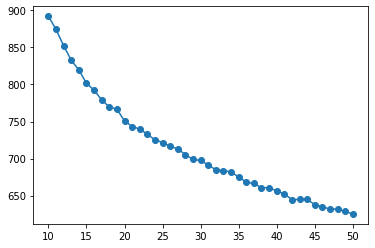

In [13]:
plt.plot(arr,inertia)
plt.scatter(arr,inertia)

In [14]:
km=KMeans(n_clusters=16,init="k-means++")
km.fit(X)
inertia.append(km.inertia_)
df['Clusters']=km.labels_

In [15]:
df.head()

,File_name,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,Clusters
0,text (1).txt,0.080314,0.215110,-0.112809,-0.169757,0.009291,0.067939,-0.253601,-0.036148,0.076020,...,0.121182,-0.097925,0.054979,0.063338,0.058147,-0.066809,0.146027,-0.054699,0.083929,0
1,text (10).txt,0.058517,0.216435,-0.048337,-0.232963,0.082943,0.101053,-0.341938,0.075348,0.021606,...,0.083983,-0.057246,0.093794,0.141730,-0.108440,-0.077377,0.121590,-0.031576,0.145341,13
2,text (100).txt,0.043484,0.119912,-0.071150,-0.200412,0.041910,0.119229,-0.178916,-0.017803,0.036452,...,0.075090,-0.126771,0.044595,0.036062,0.033405,-0.028457,0.086145,-0.017459,0.065640,11
3,text (1000).txt,0.060377,0.260237,-0.073447,-0.215268,-0.000299,0.190514,-0.418936,0.034616,0.021785,...,0.086299,-0.056962,0.066033,0.069914,-0.022761,-0.010564,0.129973,-0.073166,0.238873,4
4,text (1001).txt,0.044396,0.113152,-0.148489,-0.168943,0.026190,0.122647,-0.056111,-0.156699,0.010596,...,0.069248,-0.125327,0.062113,0.100228,0.105418,0.033606,0.025853,-0.201114,0.010124,14
